# Introduction
## This project explores restaurant order data to understand patterns during breakfast hours. The goal is to identify demand trends that can support better kitchen staffing and preparation decisions. Exploratory Data Analysis (EDA) is used to surface these patterns.

# Step 0 : Data Orientation
Importing and Reading data

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [140]:
df = pd.read_csv('restaurant_orders.csv')

# Step 1: Data Understanding
1. Dataframe (shape)
2. Head & Tail of the data
3. dtypes
4. describe

In [141]:
df.shape

(500, 8)

In [142]:
df.head()

,Order ID,Customer Name,Food Item,Category,Quantity,Price,Payment Method,Order Time
0,2268,Mary Vega DDS,Pasta,Main,5,16.52,Cash,2025-02-02 14:28:41
1,3082,Brandon Myers,Brownie,Dessert,4,17.27,Debit Card,2025-06-08 10:57:47
2,3160,Margaret Wells,Pasta,Main,1,3.37,Credit Card,2025-03-04 07:41:41
3,1272,Michael Matthews,Pasta,Main,5,2.20,Online Payment,2025-05-15 12:43:45
4,9447,Connor Williams,Soup,Starter,1,12.23,Cash,2025-03-15 14:25:56


In [143]:
df.tail()

,Order ID,Customer Name,Food Item,Category,Quantity,Price,Payment Method,Order Time
495,6323,Alyssa Anthony,Pizza,Main,1,21.31,Cash,2025-01-15 19:21:02
496,9836,Jerry Pineda,Soup,Starter,3,15.99,Debit Card,2025-07-15 15:00:19
497,1202,Brandy Smith,Pasta,Main,2,8.54,Credit Card,2025-08-03 23:47:28
498,7876,Ivan Haynes,Soup,Starter,5,20.54,Credit Card,2025-07-23 08:10:06
499,1509,Amber Mendez,Ice Cream,Dessert,2,18.86,Online Payment,2025-08-09 05:11:27


In [144]:
df.dtypes

Order ID            int64
Customer Name      object
Food Item          object
Category           object
Quantity            int64
Price             float64
Payment Method     object
Order Time         object
dtype: object

In [145]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order ID,500.0,5683.29600,2599.688068,1055.00,3342.00,5762.000,7945.00,9997.00
Quantity,500.0,3.03000,1.474261,1.00,2.00,3.000,4.00,5.00
Price,500.0,13.19718,6.685852,2.06,7.28,13.305,19.08,24.99


# Step 2: Data Preparation
1. Finding Null Values
2. Finding Duplicate Values
3. Inspecting and Adding columns

In [146]:
df.isna().sum()

Order ID          0
Customer Name     0
Food Item         0
Category          0
Quantity          0
Price             0
Payment Method    0
Order Time        0
dtype: int64

In [147]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [148]:
df['total_sum'] = df['Quantity']*df['Price']
df

,Order ID,Customer Name,Food Item,Category,Quantity,Price,Payment Method,Order Time,total_sum
0,2268,Mary Vega DDS,Pasta,Main,5,16.52,Cash,2025-02-02 14:28:41,82.60
1,3082,Brandon Myers,Brownie,Dessert,4,17.27,Debit Card,2025-06-08 10:57:47,69.08
2,3160,Margaret Wells,Pasta,Main,1,3.37,Credit Card,2025-03-04 07:41:41,3.37
3,1272,Michael Matthews,Pasta,Main,5,2.20,Online Payment,2025-05-15 12:43:45,11.00
4,9447,Connor Williams,Soup,Starter,1,12.23,Cash,2025-03-15 14:25:56,12.23
...,...,...,...,...,...,...,...,...,...
495,6323,Alyssa Anthony,Pizza,Main,1,21.31,Cash,2025-01-15 19:21:02,21.31
496,9836,Jerry Pineda,Soup,Starter,3,15.99,Debit Card,2025-07-15 15:00:19,47.97
497,1202,Brandy Smith,Pasta,Main,2,8.54,Credit Card,2025-08-03 23:47:28,17.08
498,7876,Ivan Haynes,Soup,Starter,5,20.54,Credit Card,2025-07-23 08:10:06,102.70


In [149]:
df.rename(columns= {'Customer Name': 'Customer_Name'}, inplace = True)

In [150]:
df['Order Time'] = pd.to_datetime(df['Order Time'])

df['time'] = df['Order Time'].dt.time
df['day_name'] = df['Order Time'].dt.day_name()
df['month'] = df['Order Time'].dt.month
df['hour'] = df['Order Time'].dt.hour
df['date'] = df['Order Time'].dt.date
df

,Order ID,Customer_Name,Food Item,Category,Quantity,Price,Payment Method,Order Time,total_sum,time,day_name,month,hour,date
0,2268,Mary Vega DDS,Pasta,Main,5,16.52,Cash,2025-02-02 14:28:41,82.60,14:28:41,Sunday,2,14,2025-02-02
1,3082,Brandon Myers,Brownie,Dessert,4,17.27,Debit Card,2025-06-08 10:57:47,69.08,10:57:47,Sunday,6,10,2025-06-08
2,3160,Margaret Wells,Pasta,Main,1,3.37,Credit Card,2025-03-04 07:41:41,3.37,07:41:41,Tuesday,3,7,2025-03-04
3,1272,Michael Matthews,Pasta,Main,5,2.20,Online Payment,2025-05-15 12:43:45,11.00,12:43:45,Thursday,5,12,2025-05-15
4,9447,Connor Williams,Soup,Starter,1,12.23,Cash,2025-03-15 14:25:56,12.23,14:25:56,Saturday,3,14,2025-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,6323,Alyssa Anthony,Pizza,Main,1,21.31,Cash,2025-01-15 19:21:02,21.31,19:21:02,Wednesday,1,19,2025-01-15
496,9836,Jerry Pineda,Soup,Starter,3,15.99,Debit Card,2025-07-15 15:00:19,47.97,15:00:19,Tuesday,7,15,2025-07-15
497,1202,Brandy Smith,Pasta,Main,2,8.54,Credit Card,2025-08-03 23:47:28,17.08,23:47:28,Sunday,8,23,2025-08-03
498,7876,Ivan Haynes,Soup,Starter,5,20.54,Credit Card,2025-07-23 08:10:06,102.70,08:10:06,Wednesday,7,8,2025-07-23


In [151]:
month_mapping = {
    1 : 'January',
    2 : 'February',
    3 : 'March',
    4 : 'April',
    5 : 'May',
    6 : 'June',
    7 : 'July',
    8 : 'August',
    9 : 'September',
    10 : 'October',
    11 : 'November',
    12 : 'December' }

df['month_name'] = df['Order Time'].dt.month.map(month_mapping)
df

,Order ID,Customer_Name,Food Item,Category,Quantity,Price,Payment Method,Order Time,total_sum,time,day_name,month,hour,date,month_name
0,2268,Mary Vega DDS,Pasta,Main,5,16.52,Cash,2025-02-02 14:28:41,82.60,14:28:41,Sunday,2,14,2025-02-02,February
1,3082,Brandon Myers,Brownie,Dessert,4,17.27,Debit Card,2025-06-08 10:57:47,69.08,10:57:47,Sunday,6,10,2025-06-08,June
2,3160,Margaret Wells,Pasta,Main,1,3.37,Credit Card,2025-03-04 07:41:41,3.37,07:41:41,Tuesday,3,7,2025-03-04,March
3,1272,Michael Matthews,Pasta,Main,5,2.20,Online Payment,2025-05-15 12:43:45,11.00,12:43:45,Thursday,5,12,2025-05-15,May
4,9447,Connor Williams,Soup,Starter,1,12.23,Cash,2025-03-15 14:25:56,12.23,14:25:56,Saturday,3,14,2025-03-15,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,6323,Alyssa Anthony,Pizza,Main,1,21.31,Cash,2025-01-15 19:21:02,21.31,19:21:02,Wednesday,1,19,2025-01-15,January
496,9836,Jerry Pineda,Soup,Starter,3,15.99,Debit Card,2025-07-15 15:00:19,47.97,15:00:19,Tuesday,7,15,2025-07-15,July
497,1202,Brandy Smith,Pasta,Main,2,8.54,Credit Card,2025-08-03 23:47:28,17.08,23:47:28,Sunday,8,23,2025-08-03,August
498,7876,Ivan Haynes,Soup,Starter,5,20.54,Credit Card,2025-07-23 08:10:06,102.70,08:10:06,Wednesday,7,8,2025-07-23,July


In [152]:
month_order = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]

df['month_name'] = pd.Categorical(
    df['month_name'],
    categories = month_order,
    ordered = True)


In [153]:
df.shape

(500, 15)

In [154]:
df.columns

Index(['Order ID', 'Customer_Name', 'Food Item', 'Category', 'Quantity',
       'Price', 'Payment Method', 'Order Time', 'total_sum', 'time',
       'day_name', 'month', 'hour', 'date', 'month_name'],
      dtype='object')

# About the data - 

## Order ID: A unique number assigned to each order.

## Customer_Name: The name of the customer who placed the order.

## Food Item: The specific food  or drink item ordered.

## Category: The category of the food item (e.g., Main, Dessert, Starter)

## Quantity: The number of units of a specific food item in one order.

## Price: The price of a single unit of the food item.

## Payment Method: The mode of payment. (e.g., Cash, Debit Card, Credit Card).

## Order Time: The exact date and time the order was placed.

## total_sum: The total amount paid by the customer.

## time: The specific hour,minute and second of when the order was placed.

## day_name : Name of the day when order was placed.

## month: The numerical month of the order (e.g., 1 for January, 2 for February).

## hour: The hour of the day the order was placed.

## month_name: The name of the month (e.g., January, February).

## date : The numerical value of the date when order was placed.

# Note: August has partial data coverage (15 days only).

In [155]:
df.loc[df['month_name'] == "August",:].sort_values(by = 'date')

,Order ID,Customer_Name,Food Item,Category,Quantity,Price,Payment Method,Order Time,total_sum,time,day_name,month,hour,date,month_name
55,6309,Sheri White,Salad,Starter,5,15.44,Online Payment,2025-08-01 17:25:44,77.20,17:25:44,Friday,8,17,2025-08-01,August
73,2234,Jillian Jackson,Brownie,Dessert,3,21.28,Debit Card,2025-08-01 16:44:35,63.84,16:44:35,Friday,8,16,2025-08-01,August
121,9240,Zachary Fisher,Brownie,Dessert,5,7.57,Debit Card,2025-08-01 08:53:34,37.85,08:53:34,Friday,8,8,2025-08-01,August
126,8430,Matthew Hays,Ice Cream,Dessert,1,4.10,Cash,2025-08-01 20:43:44,4.10,20:43:44,Friday,8,20,2025-08-01,August
386,6272,Vicki Taylor,Ice Cream,Dessert,2,3.80,Online Payment,2025-08-03 20:50:56,7.60,20:50:56,Sunday,8,20,2025-08-03,August
497,1202,Brandy Smith,Pasta,Main,2,8.54,Credit Card,2025-08-03 23:47:28,17.08,23:47:28,Sunday,8,23,2025-08-03,August
24,9125,Cindy Smith,Fries,Starter,3,16.68,Online Payment,2025-08-04 13:08:16,50.04,13:08:16,Monday,8,13,2025-08-04,August
478,6686,John Sutton,Burger,Main,2,6.44,Debit Card,2025-08-04 07:20:19,12.88,07:20:19,Monday,8,7,2025-08-04,August
392,8279,Richard Roberts,Burger,Main,2,12.61,Credit Card,2025-08-04 00:41:21,25.22,00:41:21,Monday,8,0,2025-08-04,August
43,9211,Richard Lee,Pizza,Main,5,6.59,Cash,2025-08-05 22:33:42,32.95,22:33:42,Tuesday,8,22,2025-08-05,August


# Step 3 - Feature Understanding 

## Plotting feature distributions, Univariate Analysis 

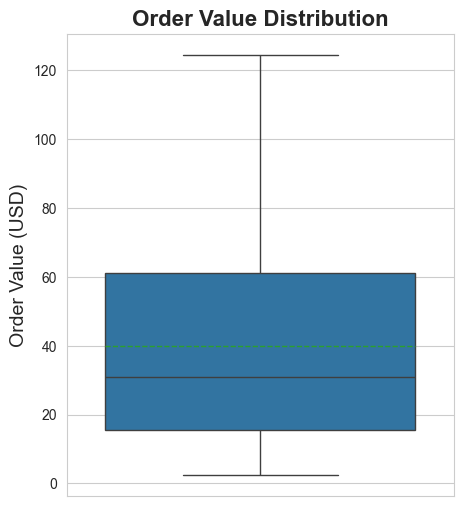

In [194]:
sns.set_style("whitegrid")
plt.subplots(figsize = (5,6))
sns.boxplot(data = df, y= df['total_sum'], showmeans = True, meanline = True, fill = True)
plt.title('Order Value Distribution',weight='bold', fontsize = 16)
plt.ylabel("Order Value (USD)", fontsize = 14)

plt.show()

# Observation
## The orders are right-skewed, most of the order amount is below 40USD along with a few higher value orders.

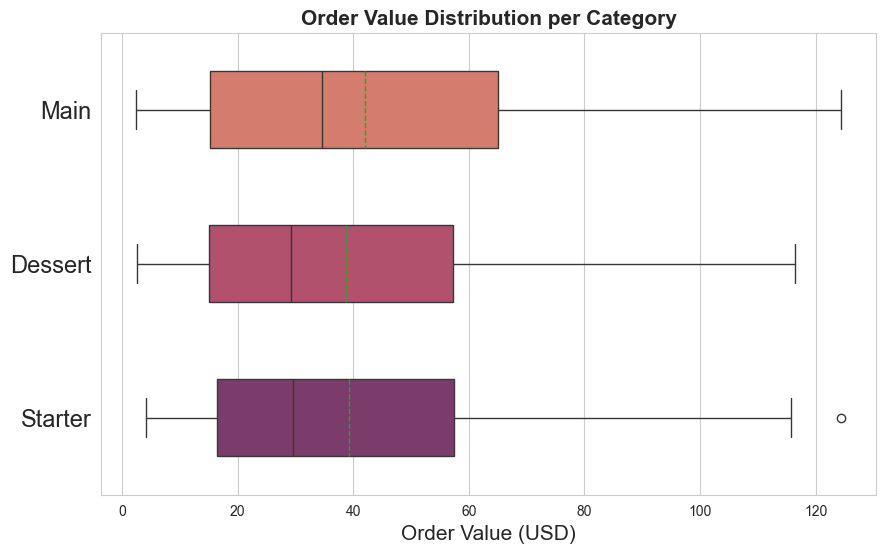

In [192]:
fig,ax = plt.subplots(figsize = (10,6))
sns.set_style("whitegrid")
sns.boxplot(data= df, x=df['total_sum'], y=df['Category'], 
            fill=True, 
            width = 0.5, 
            palette = 'flare',
            showmeans = True, 
            meanline = True,
           hue = df['Category'])
# ax.set_yticks(ax.get_yticks())
# ax.set_yticklabels(ax.get_yticklabels(), rotation=90)
ax.tick_params(axis = 'y', labelsize = 17)
plt.title("Order Value Distribution per Category", fontsize = 15, weight='bold')
plt.xlabel("Order Value (USD)", fontsize = 15)
plt.ylabel("")

plt.show()

# Observation
## Although Main category shows a slightly higher mean & median value, the overall revenue distribution across categories is largely similar, with substantial overlap in their interquartile ranges.



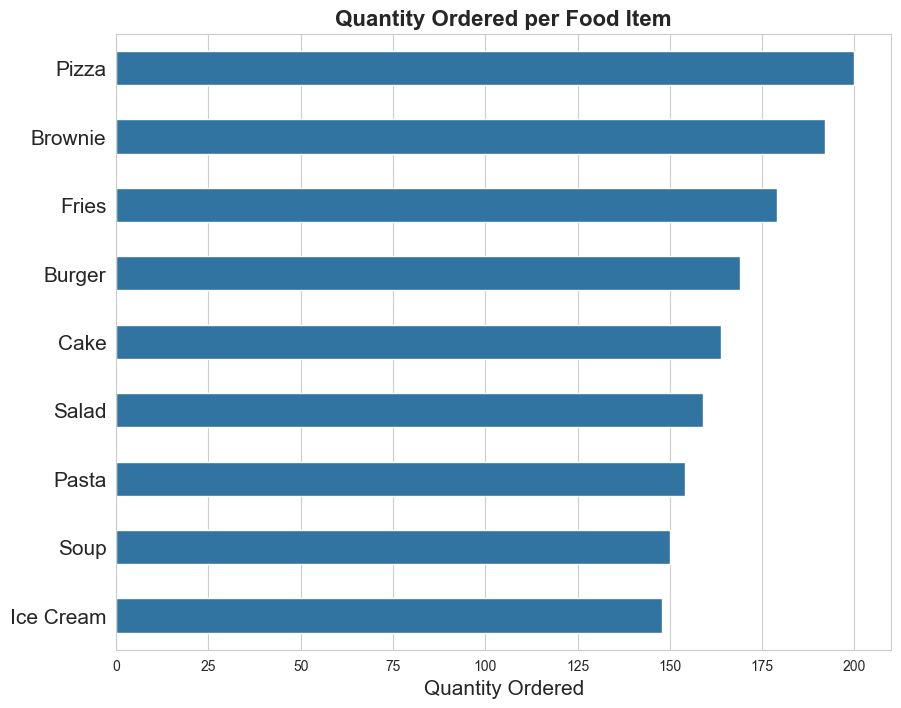

In [191]:
fig, ax = plt.subplots(figsize = (10,8))
sns.set_style("whitegrid")
food_ordered_qty = df.groupby(df['Food Item'])['Quantity'].sum().sort_values(ascending = False)
sns.barplot(x = food_ordered_qty.values, y= food_ordered_qty.index, width = 0.5)
ax.tick_params(axis='y', labelsize=15)
plt.xlabel("Quantity Ordered", fontsize = 15)
plt.ylabel("")
plt.title("Quantity Ordered per Food Item", fontsize = 16, weight='bold')

plt.show()


# Observation
## Pizza dominates in terms of total quantity ordered, indicating higher overall demand relative to other food items.


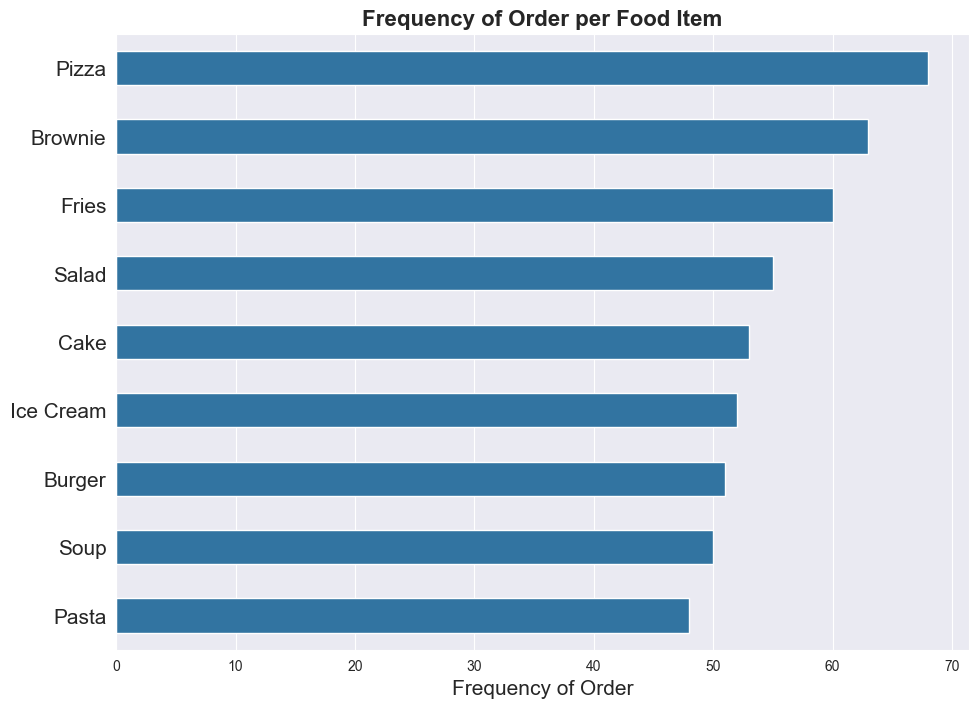

In [190]:
fig, ax = plt.subplots(figsize = (11,8))
sns.set_style("whitegrid")
food_ordered_fqy = df['Food Item'].value_counts().sort_values(ascending = False)
sns.barplot(x = food_ordered_fqy.values, y= food_ordered_fqy.index, width = 0.5)
ax.tick_params(axis='y', labelsize=15)
plt.xlabel("Frequency of Order", fontsize = 15)
plt.ylabel("")
plt.title("Frequency of Order per Food Item", fontsize = 16, weight='bold')

plt.show()


# Observation
## Pizza leads in order frequency, suggesting strong and consistent demand relative to other food items.

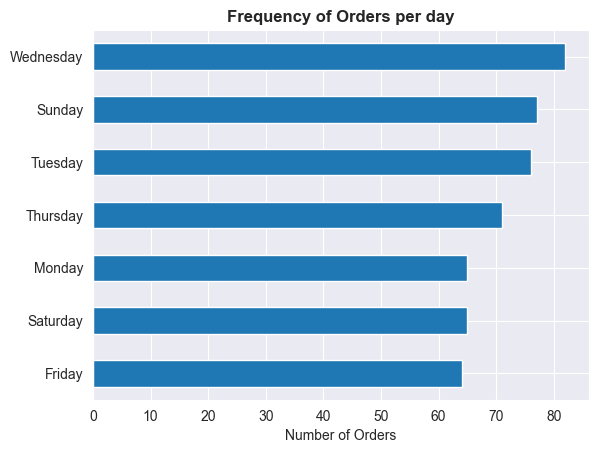

In [189]:
df['day_name'].value_counts().sort_values().plot(kind='barh')
plt.ylabel("")
plt.title("Frequency of Orders per day", weight='bold')
plt.xlabel("Number of Orders")
plt.show()

# Observation 
## Wednesday has the highest frequency of orders, indicating increased order activity compared to other weekdays.

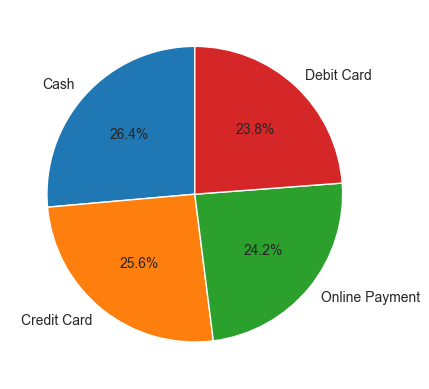

In [161]:
pc2 = df['Payment Method'].value_counts()
plt.pie(pc2.values,
       labels= pc2.index,
       startangle = 90,
       autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'white'})
plt.show()

# Observation 
## Even though Cash is the most used payment method, the distribution is fairly even indicating no strong customer preference for a single payment mode.

# Step 4 : Feature Relationship 

In [162]:
hourly_orders = df.groupby(['hour']).total_sum.sum()
x_hourly_orders = hourly_orders.index
y_hourly_orders = hourly_orders.values

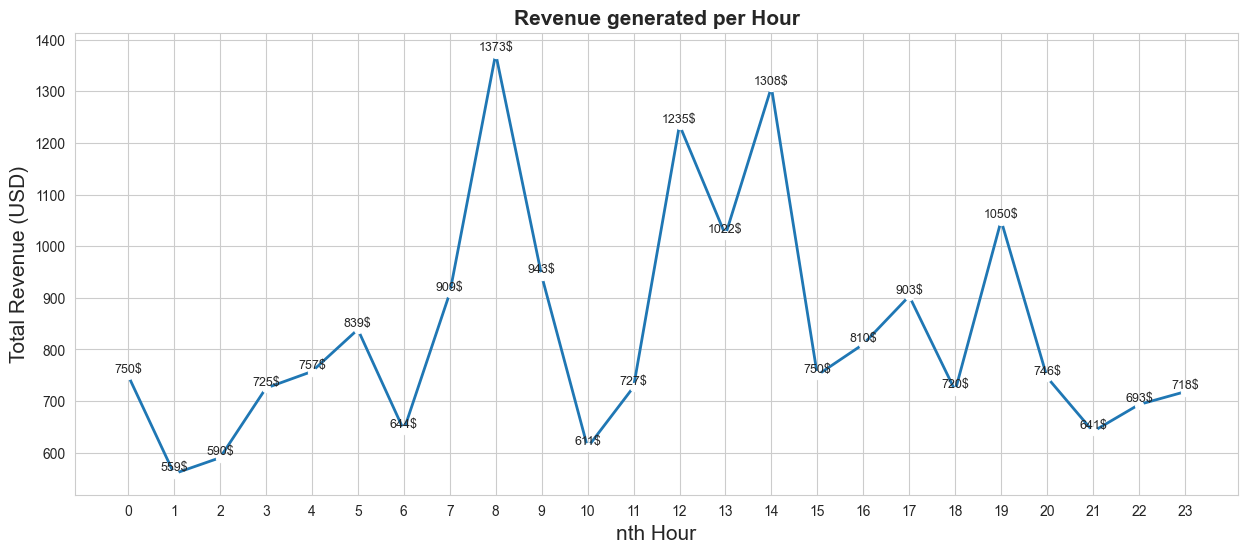

In [188]:
fig,ax = plt.subplots(figsize=(15,6))

for x, y in zip(x_hourly_orders, y_hourly_orders):
    ax.text(
        x, y,
        f"{y:.0f}$",
        ha='center',
        va='bottom',
        fontsize=9
    )

    
sns.set_style("darkgrid")
sns.lineplot(x = x_hourly_orders, y= y_hourly_orders, marker = "o", markerfacecolor = "w", linewidth = 2)
ax.set_xticks(x_hourly_orders)
plt.title("Revenue generated per Hour", fontsize = 15, weight='bold')
plt.xlabel("nth Hour", fontsize = 15)
plt.ylabel("Total Revenue (USD)", fontsize = 15)

plt.show()


# Observation
## Revenue shows clear peaks during the breakfast (7-9 AM) and lunch (12-2 PM), indicating that these meal periods contribute disproportionately higher revenue compared to the rest of the day.



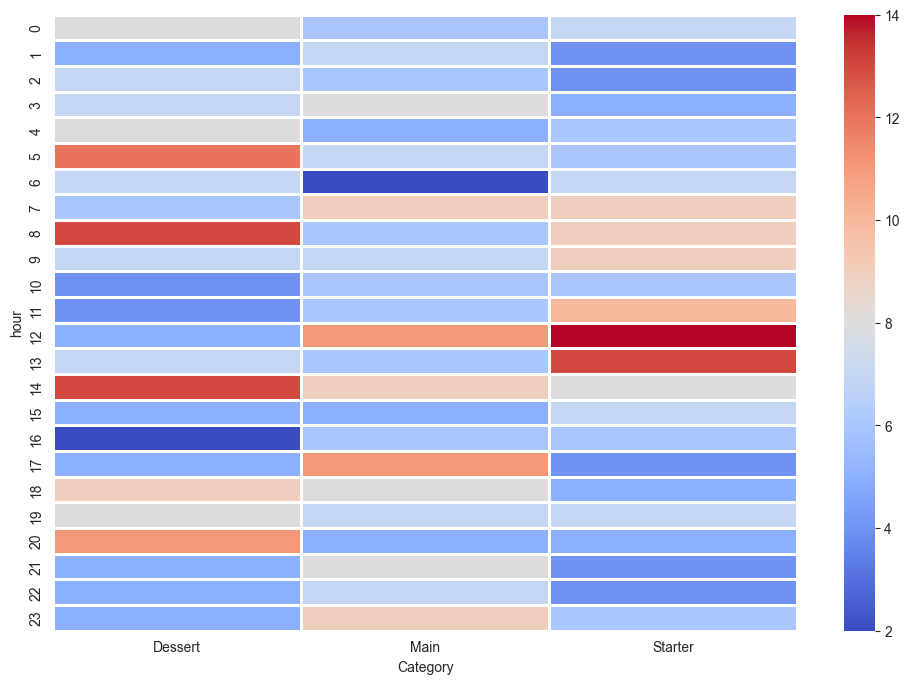

In [164]:
category_byhour = df.groupby('hour')['Category'].value_counts().unstack()
plt.figure(figsize = (12,8))
sns.heatmap(category_byhour, linewidths = 1, cmap = 'coolwarm')
plt.show()

# Step 5 : Asking Questions

## Aim : Breakfast Optimization
### The goal is to dig deeper into the breakfast hours of the restaurant and find data-driven insights which can help the restaurant optimize their operations better during breakfasts.

In [165]:
df_bfast = df.loc[df['hour'].between(6,9), :]

In [166]:
bfast_items_fqy = df_bfast['Food Item'].value_counts().sort_values(ascending = False)

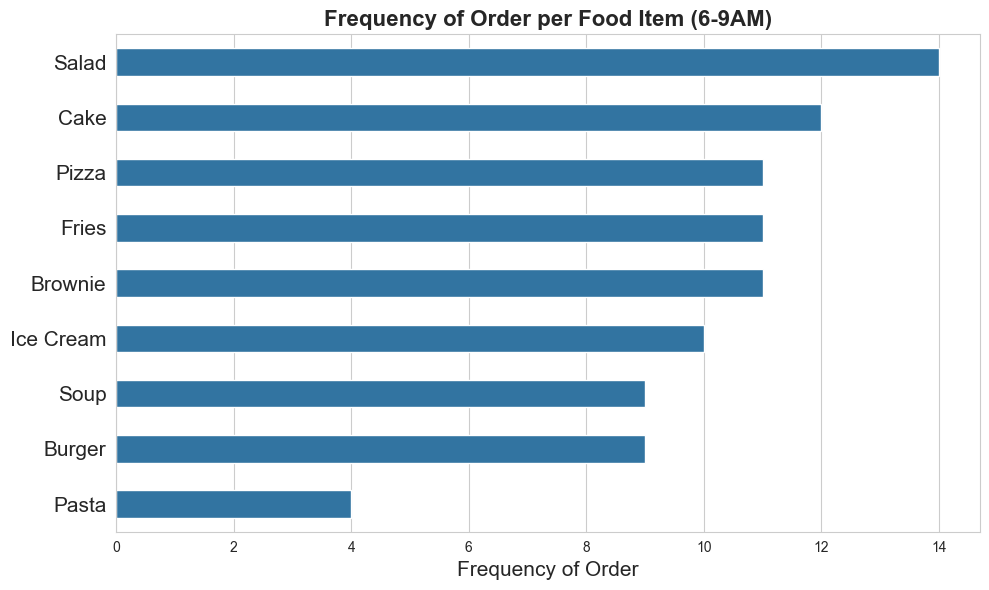

In [187]:
fig, ax = plt.subplots(figsize = (10,6))
sns.set_style("whitegrid")
sns.barplot(x = bfast_items_fqy.values, y= bfast_items_fqy.index, width = 0.5)
ax.tick_params(axis='y', labelsize=15)
plt.xlabel("Frequency of Order", fontsize = 15)
plt.ylabel("")
plt.title("Frequency of Order per Food Item (6-9AM)", fontsize = 16, weight='bold')

plt.tight_layout()
plt.show()


# Observation
## During the 6–9 AM window, Salad shows the highest order frequency, suggesting it is the most commonly chosen breakfast item in this dataset, while Pasta is the least ordered.

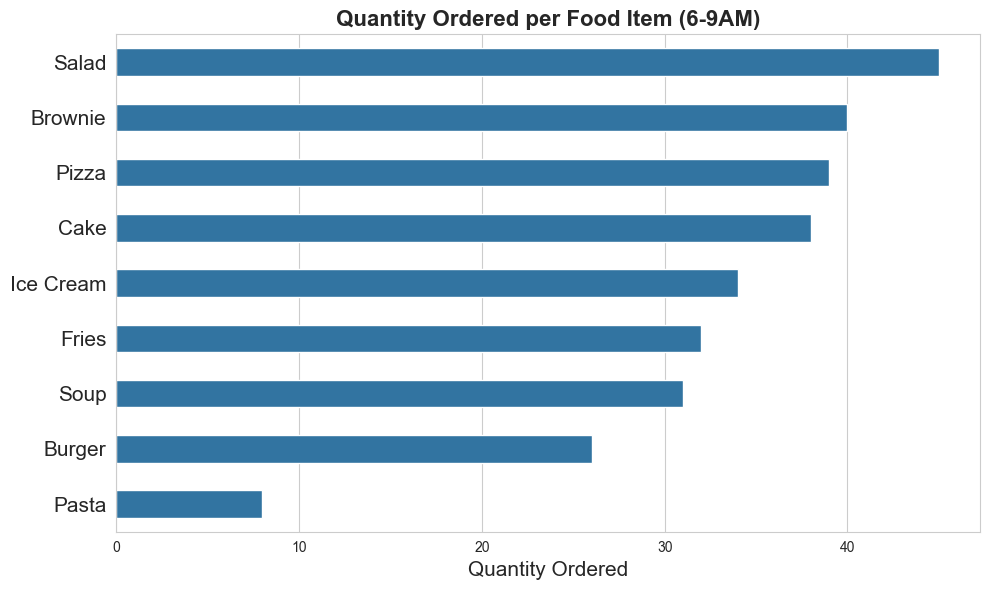

In [186]:
bfast_items_qty = df_bfast.groupby('Food Item')['Quantity'].sum().sort_values(ascending = False)


fig, ax = plt.subplots(figsize = (10,6))
sns.set_style("whitegrid")
sns.barplot(x = bfast_items_qty.values, y= bfast_items_qty.index, width = 0.5)
ax.tick_params(axis='y', labelsize=15)
plt.xlabel("Quantity Ordered", fontsize = 15)
plt.ylabel("")
plt.title("Quantity Ordered per Food Item (6-9AM)", fontsize = 16, weight='bold')

plt.tight_layout()
plt.show()


# Observation
## During the 6-9 AM window, Salad leads in terms of Quantity ordered, suggesting it is the most commonly ordered breakfast item in this dataset, while Pasta records the lowest quantity sold.

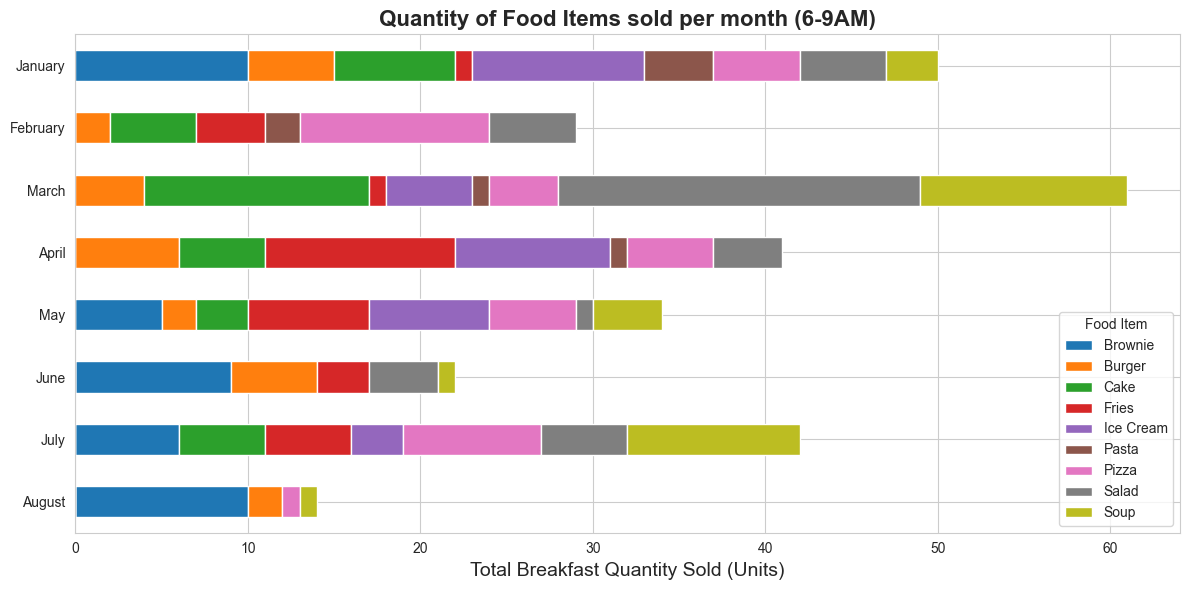

In [185]:
fig,ax = plt.subplots(figsize= (12,6))

bfast_quantity = df_bfast.groupby(['month_name', 'Food Item'], observed = True)['Quantity'].sum().unstack().iloc[::-1]
bfast_quantity.plot(kind = 'barh', stacked = True, ax=ax )

plt.ylabel("")
plt.xlabel("Total Breakfast Quantity Sold (Units)", fontsize = 14)
plt.title('Quantity of Food Items sold per month (6-9AM)', fontsize = 16, weight='bold')

plt.tight_layout()
plt.show()



# Observation
## In terms of units sold during breakfast hours (6–9 AM), March records the highest activity among all months, while June shows the lowest. This indicates stronger breakfast demand volume in March.
### Note: August has partial data coverage (15 days only).

# Q. Is seasonal breakfast demand stable?

In [170]:
std_bfast_quantity =  np.std(df_bfast.groupby('month_name', observed = True)['Quantity'].sum())
mean_bfast_quantity = np.mean(df_bfast.groupby('month_name', observed = True)['Quantity'].sum())
cv = std_bfast_quantity / mean_bfast_quantity * 100

print(f"Standard Deviation: {std_bfast_quantity} ")
print(f"Mean: {mean_bfast_quantity}")
print(f"Coefficient of Variation: {cv:.2f}%")


Standard Deviation: 14.194519188757328 
Mean: 36.625
Coefficient of Variation: 38.76%


## Seasonal Stability of Breakfast Demand

To assess whether breakfast demand is seasonally stable, the **Coefficient of Variation (CV)** was calculated across monthly breakfast quantities.

The CV is defined as the ratio of the standard deviation to the mean and measures **relative variability** in the data.

- **Mean monthly breakfast quantity:** 36.63  
- **Standard deviation:** 14.19  
- **Coefficient of Variation (CV):** **38.76%**

A CV in the range of **30–40%** indicates **moderate variability**, meaning demand fluctuates across months but remains within a predictable range.  
This suggests that breakfast demand is **moderately stable rather than highly volatile**.

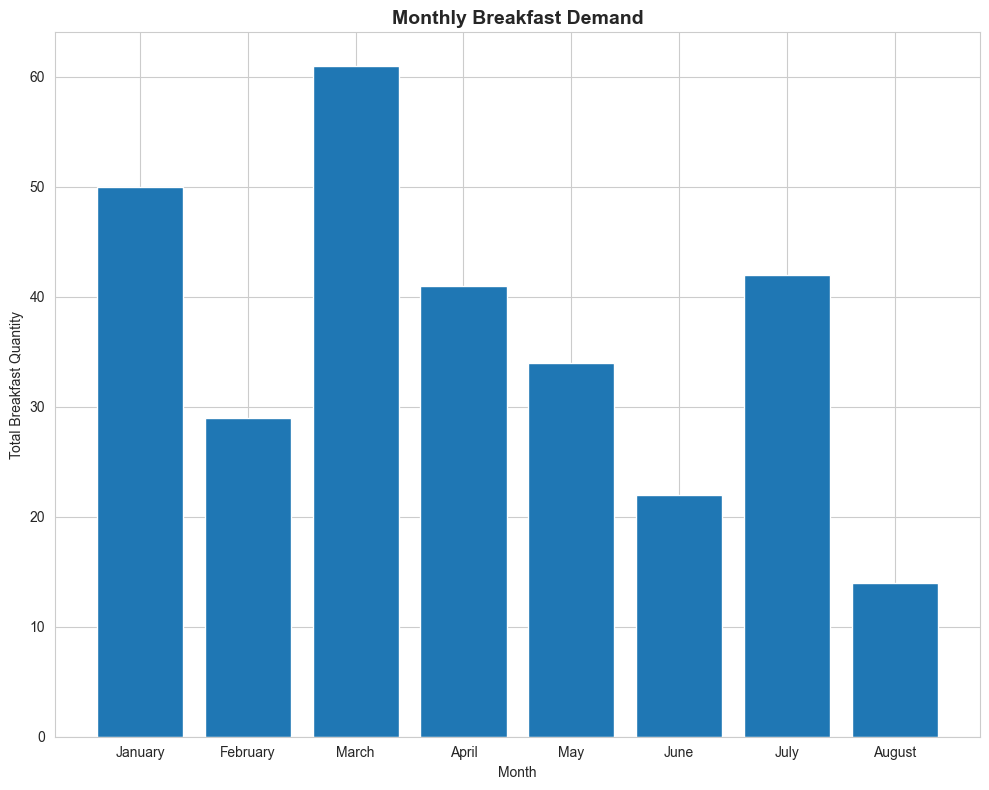

In [184]:
fig, ax = plt.subplots(figsize=(10,8))

monthly_qty = df_bfast.groupby('month_name', observed=True)['Quantity'].sum()
ax.bar(monthly_qty.index, monthly_qty.values)

ax.set_title("Monthly Breakfast Demand", fontsize=14, weight='bold')
ax.set_xlabel("Month")
ax.set_ylabel("Total Breakfast Quantity")

plt.tight_layout()
plt.show()

# Observation
While some months (e.g., March and January) exhibit higher demand and others (e.g., June and February) show lower volumes, the variation does not indicate extreme seasonality.  
Overall, breakfast demand demonstrates **consistent but not uniform** monthly behavior.

# Actionable Insights & Business Recommendations

## 1) Re-evaluate Pasta Offering During Breakfast Hours (6–9 AM)
### EDA results show that Pasta consistently records the lowest frequency and quantity ordered during breakfast hours compared to other food items. This indicates weak demand during this time window.

# Recommended actions -
**Either remove Pasta from the breakfast menu to reduce preparation overhead and kitchen complexity**
**Or increase Pasta pricing during breakfast hours to test whether existing customers are niche, repeat buyers willing to pay a premium**

Before finalizing this decision, a follow-up analysis on repeat customers ordering Pasta (using customer-level queries) should be conducted to confirm whether Pasta demand is driven by a small, loyal segment.

In [195]:
df_bfast.loc[df_bfast['Food Item'] == "Pasta", :]
# df.loc[df.duplicated(subset = "Customer_Name")]
# df.duplicated(subset = "Customer Name").value_counts() (3)
df.query(
    'Customer_Name.isin(["Margaret Wells", "Jessica Jacobs", "Mrs. Kristi Myers", "Maurice Lyons"])'
)

,Order ID,Customer_Name,Food Item,Category,Quantity,Price,Payment Method,Order Time,total_sum,time,day_name,month,hour,date,month_name
2,3160,Margaret Wells,Pasta,Main,1,3.37,Credit Card,2025-03-04 07:41:41,3.37,07:41:41,Tuesday,3,7,2025-03-04,March
153,9301,Jessica Jacobs,Pasta,Main,1,17.89,Credit Card,2025-04-07 07:43:46,17.89,07:43:46,Monday,4,7,2025-04-07,April
291,3402,Mrs. Kristi Myers,Pasta,Main,2,21.07,Cash,2025-02-04 08:47:41,42.14,08:47:41,Tuesday,2,8,2025-02-04,February
297,7554,Maurice Lyons,Pasta,Main,4,2.69,Credit Card,2025-01-12 07:18:52,10.76,07:18:52,Sunday,1,7,2025-01-12,January


## 2) Optimize Staffing and Inventory for Breakfast Peak Months
### Seasonal analysis using the Coefficient of Variation (CV ≈ 38.8%) indicates that breakfast demand is moderately stable, but not uniform across months. March and January show significantly higher breakfast activity, while June and Feburary are comparatively low (with August having partial data).

# Recommended actions-
**Increase breakfast staffing and ingredient inventory during high-demand months (January–March)**
**Reduce overstaffing and perishable inventory during low-demand months (June–Feburary)**

This allows cost optimization without risking service delays during peak periods.

## 3) Leverage High-Performing Breakfast Items for Bundling & Promotions
### Salad, Pizza, and Brownie consistently rank high in both frequency and quantity during breakfast hours, indicating strong customer preference.

# Recommended actions - 

**Introduce breakfast combo deals (e.g., Salad + Beverage, Pizza Slice + Dessert)**
**Highlight these items as “Breakfast Specials” during 6–9 AM** <br>
Use them as anchor products to upsell low-performing items

This strategy increases average order value while leveraging already popular choices.